In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')


## How many different variants of Type 1 pokemons are there along with the counts?

In [2]:
# load data
df = pd.read_csv('file.csv')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [4]:
import pandas as pd

# load data
df = pd.read_csv('file.csv')

# reset index to 'Name'
df.set_index('Name', inplace=True)

# drop column '#'
df.drop('#', inplace=True, axis=1)

type_1_data = df['Type 1'].value_counts()
type_1_data

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

<BarContainer object of 18 artists>

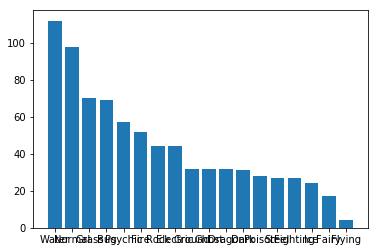

In [19]:
# load data
df = pd.read_csv('file.csv')

# reset index to 'Name'
df.set_index('Name', inplace=True)

# drop column '#'
df.drop('#', inplace=True, axis=1)

type_1_data = df['Type 1'].value_counts()

plt.bar(type_1_data.index, type_1_data)

<BarContainer object of 18 artists>

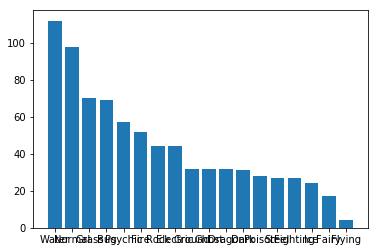

In [37]:
fig, ax = plt.subplots()
ax.bar(type_1_data.index, type_1_data)

<Figure size 1080x216 with 0 Axes>

Text(0.5, 0, 'Type 1 Pokemon Variants')

Text(0, 0.5, 'No of Pokemons')

Text(0.5, 1.0, 'Distribution of pokemons across various Type 1 variants')

<BarContainer object of 18 artists>

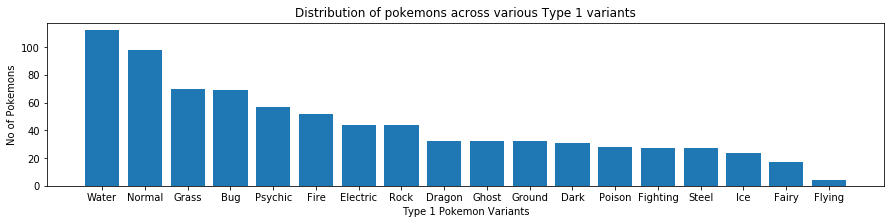

In [8]:
# initialize the figure
plt.figure(figsize=[15,3])

# label the axes
plt.xlabel("Type 1 Pokemon Variants")
plt.ylabel("No of Pokemons")

# title the plot
plt.title("Distribution of pokemons across various Type 1 variants")

# build and show the plot
plt.bar(type_1_data.index, type_1_data)

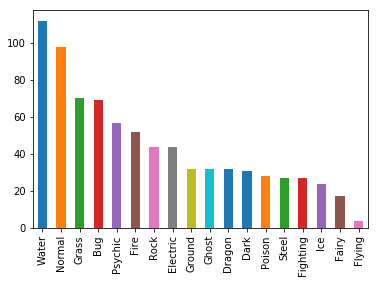

In [21]:
# keeping the same axis labels as earlier
df['Type 1'].value_counts().plot(kind="bar")

## How do Type 1 Pokemons fare against Type 2 Pokemons wrt to mean attack (Attack) points ?

In [22]:
df.head()

,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
Name,,,,,,,,,,
Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
Charmander,Fire,NaN,39,52,43,60,50,65,1,False


<Figure size 1008x576 with 0 Axes>

Text(0.5, 0, 'Types')

Text(0, 0.5, 'Mean Attack Points')

Text(0.5, 1.0, 'Comparison of Mean Attack Points for variants of Type 1 and Type 2')

(45, 120)

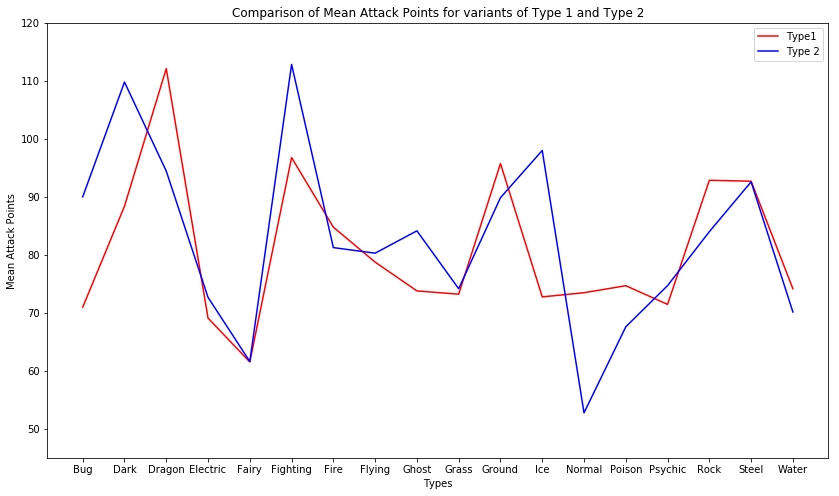

In [27]:
# Type 1 mean attack points dataframe for every category
type_1 = pd.DataFrame(df.groupby(['Type 1'])['Attack'].mean())

# Type 2 mean attack points dataframe for every category
type_2 = pd.DataFrame(df.groupby(['Type 2'])['Attack'].mean())

# Reset index for both dataframes
type_2.reset_index(inplace=True)
type_1.reset_index(inplace=True)

# Merge both dataframes
merged = pd.merge(type_1, type_2, left_on='Type 1', right_on='Type 2')

# Drop 'Type 1' column permanently
merged.drop(['Type 1'], axis=1, inplace=True)

# Rename column
merged.rename(columns={'Type 2': 'Type'}, inplace=True)

# Set size of the figure
plt.figure(figsize=(14,8))

# Line plot for 'Type 1' Pokemon mean attack points
plt.plot(merged['Type'], merged['Attack_x'], color='red')

# Line plot for 'Type 2' Pokemon mean attack points
plt.plot(merged['Type'], merged['Attack_y'], color='blue')

# Setting X-axis label
plt.xlabel('Types')

# Setting Y-axis label
plt.ylabel('Mean Attack Points')

# Title of the plot
plt.title('Comparison of Mean Attack Points for variants of Type 1 and Type 2')

# Setting Y-axis limit
plt.ylim((45, 120))

# Legend 
plt.legend(labels=['Type1', 'Type 2'])

# Display plot
plt.show()

## Which type (Type 1) of Pokemons have the highest chances of being Legendary?

Text(0.5, 0, 'Type 1')

Text(0, 0.5, 'Frequency')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

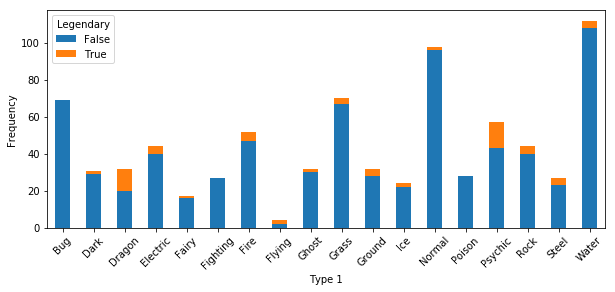

In [43]:
# Group and calculate Legendary Pokemons within each variant of 'Type 1'
df.groupby(['Type 1', 'Legendary']).size().unstack().plot(kind='bar', stacked=True, figsize=(10,4))

# Label X-axes and Y-axes
plt.xlabel('Type 1')
plt.ylabel('Frequency')

# Rotate X-axes labels
plt.xticks(rotation=45)

# Display plot
plt.show()

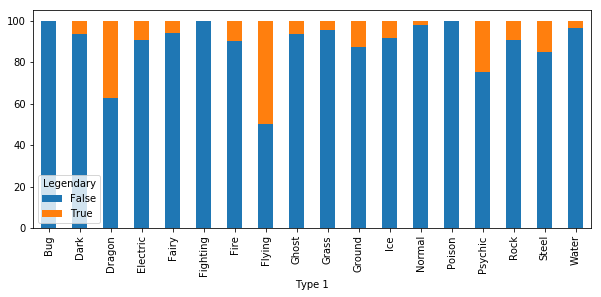

In [42]:
res = df.groupby(['Type 1', 'Legendary']).size().unstack()
# Stacked bar-chart representing percentages
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]

new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100

new_res.drop('Total', inplace=True, axis=1)

#new_res.head()
new_res.plot(kind='bar', stacked=True, figsize=(10,4))

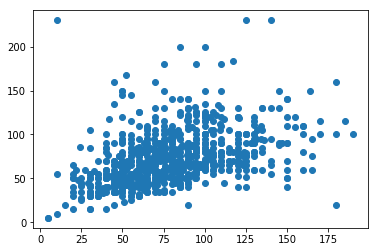

In [33]:
# Scatter plot with matplotlib
plt.scatter(df['Attack'], df['Defense'])

Legendary,False,True
Type 1,,
Bug,100.000000,0.000000
Dark,93.548387,6.451613
Dragon,62.500000,37.500000
Electric,90.909091,9.090909
Fairy,94.117647,5.882353


Text(0.5, 1.0, 'Stacked bar-chart with counts')

Text(0.5, 1.0, 'Stacked bar-chart with percentages')

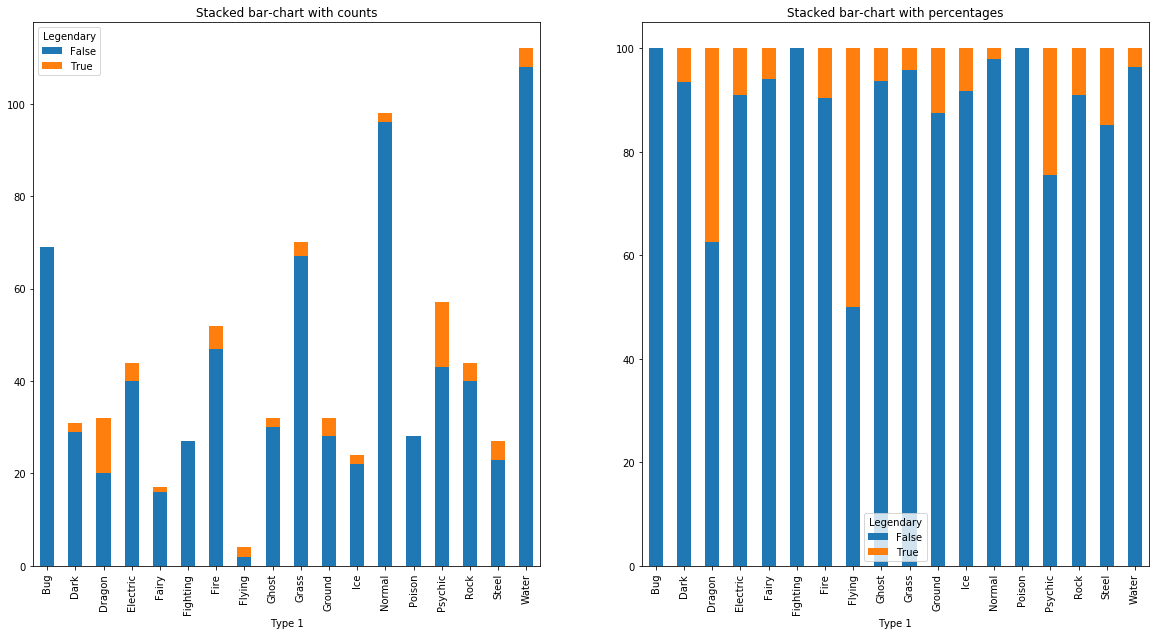

In [38]:
# Initialize figure and axes
fig, (ax_1, ax_2) = plt.subplots(1,2, figsize=(20,10))

# Stacked bar-chart representing counts
res = df.groupby(['Type 1', 'Legendary']).size().unstack()
res.plot(kind='bar', stacked=True, ax=ax_1)
ax_1.set_title('Stacked bar-chart with counts')

# Stacked bar-chart representing percentages
new_res = res.fillna(0)
new_res['Total'] = new_res[True] + new_res[False]
new_res[True] = (new_res[True] / new_res['Total']) * 100
new_res[False] = (new_res[False] / new_res['Total']) * 100
new_res.drop('Total', inplace=True, axis=1)
new_res.plot(kind='bar', stacked=True, ax=ax_2)
ax_2.set_title('Stacked bar-chart with percentages')

# Matplotlib Interfaces

Matplotlib provide two interfaces for plotting

1. MATLAB style plotting using pyplot
2. Object Oriented Interface


Text(0.5, 1.0, 'Empty figure')

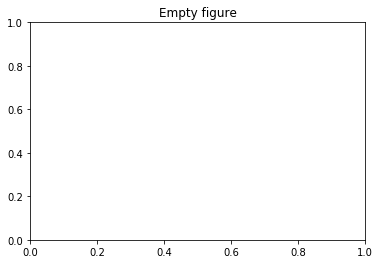

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.set_title("Empty figure")

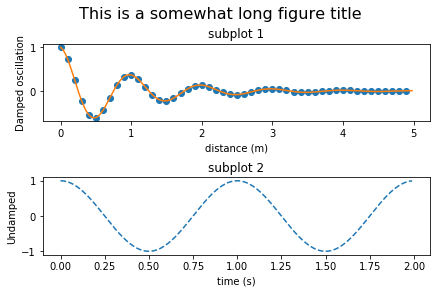

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def f(t):
    s1 = np.cos(2*np.pi*t)
    e1 = np.exp(-t)
    return s1 * e1

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)
t3 = np.arange(0.0, 2.0, 0.01)


fig, axs = plt.subplots(2, 1, constrained_layout=True)
axs[0].plot(t1, f(t1), 'o', t2, f(t2), '-')
axs[0].set_title('subplot 1')
axs[0].set_xlabel('distance (m)')
axs[0].set_ylabel('Damped oscillation')
fig.suptitle('This is a somewhat long figure title', fontsize=16)

axs[1].plot(t3, np.cos(2*np.pi*t3), '--')
axs[1].set_xlabel('time (s)')
axs[1].set_title('subplot 2')
axs[1].set_ylabel('Undamped')

plt.show()